In [1]:
import pandas as pd
import quandl as qd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import os

In [2]:
key = os.environ.get('Quandl_API_Key')

qd.ApiConfig.api_key = key

In [3]:
print(key)

None


In [3]:
# "RATEINF/INFLATION_USA" "MULTPL/SP500_PE_RATIO_MONTH" "MULTPL/SP500_EARNINGS_MONTH"

In [4]:
start_date = "1960-01-01"

end_date = "2023-01-31"

inflation_data = qd.get("RATEINF/INFLATION_USA", start_date = start_date, end_date = end_date)

pe_data = qd.get("MULTPL/SP500_PE_RATIO_MONTH", start_date = start_date, end_date = end_date)

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Nasdaq Data Link account and then include your API key with your requests.

In [ ]:
df = pd.merge_asof(left=inflation_data, right=pe_data, right_index=True,left_index=True,direction='nearest')
df = df.rename(columns={'Value_x':'Inflation',
                        'Value_y':'S&P500_PE'})
df

,Inflation,S&P500_PE
Date,,
1960-01-31,1.034,16.45
1960-02-29,1.730,16.23
1960-03-31,1.730,16.65
1960-04-30,1.724,16.72
1960-05-31,1.724,17.56
...,...,...
2022-08-31,8.263,19.98
2022-09-30,8.202,18.12
2022-10-31,7.745,20.14


In [ ]:
df.describe()

,Inflation,S&P500_PE
count,756.000000,756.000000
mean,3.766820,19.580026
std,2.850232,11.571510
min,-2.097000,6.790000
25%,1.754000,14.657500
50%,2.990500,18.035000
75%,4.707500,22.255000
max,14.756000,123.730000


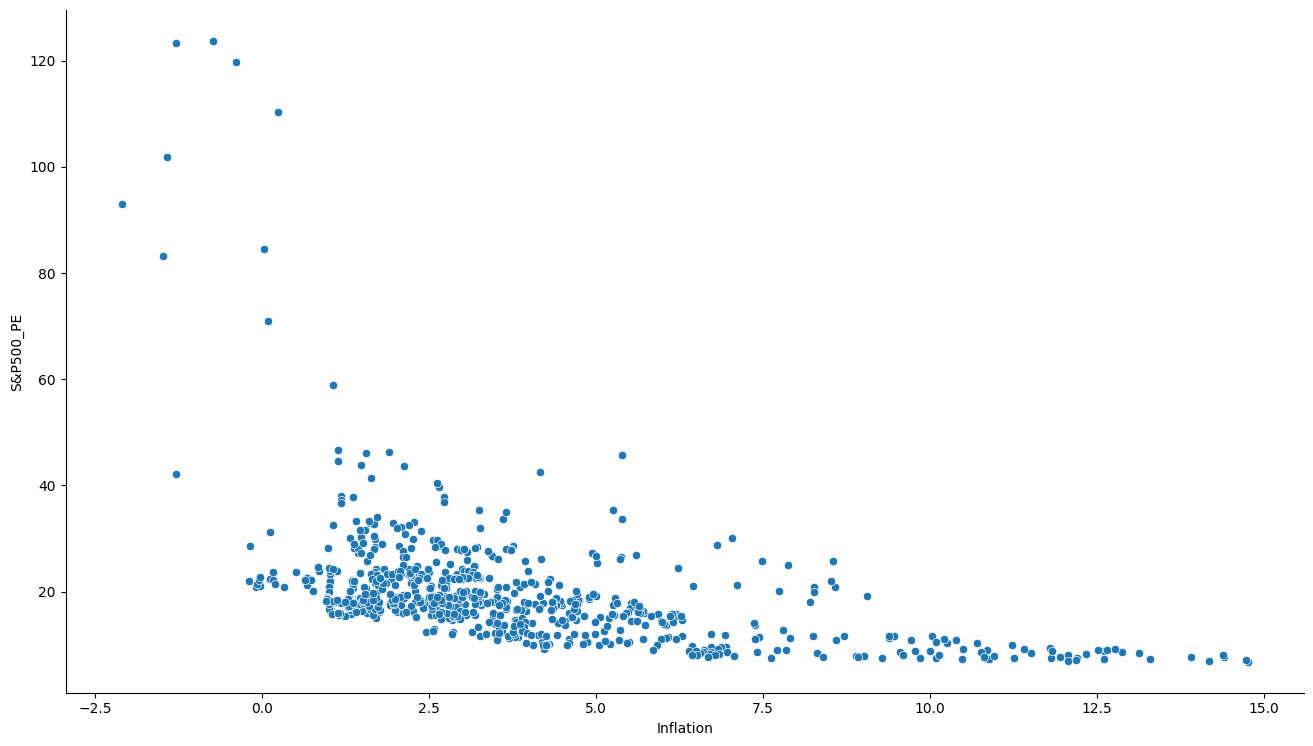

In [ ]:
g = sns.relplot(x='Inflation', y='S&P500_PE', data=df)
g.fig.set_size_inches(15,8)

In [ ]:
#Remove outliers in S&P 500

upper_limit = df['S&P500_PE'].mean()+3*df['S&P500_PE'].std()
lower_limit = df['S&P500_PE'].mean()-3*df['S&P500_PE'].std()

df = df[(df['S&P500_PE'] < upper_limit) & (df['S&P500_PE'] > lower_limit)]

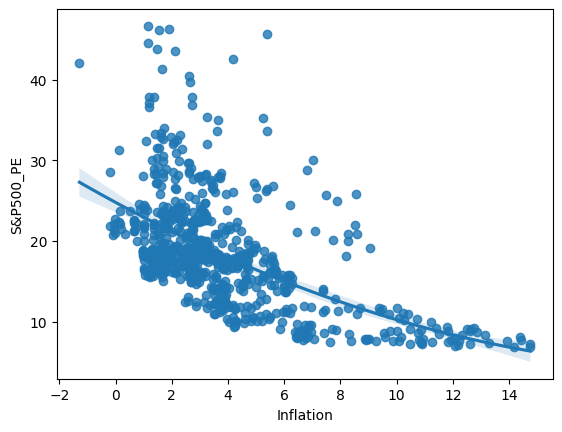

In [ ]:
sns.regplot(x='Inflation', y='S&P500_PE', data=df, order = 2);

In [ ]:
X = df['Inflation']
y = df['S&P500_PE']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


poly = PolynomialFeatures(degree=2, include_bias=False)

poly_features = poly.fit_transform(X.values.reshape(-1,1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

NameError: name 'X' is not defined

In [ ]:
print(r2_score(y,y_predicted))

0.32084621407102876


In [ ]:
#Predicting a new value that the user can input

pred2 = 1
pred2array = np.array([[pred2]])
out = poly_reg_model.predict(poly.fit_transform(pred2array))

print(f"The predicted output is {out[0]}")

NameError: name 'poly_reg_model' is not defined

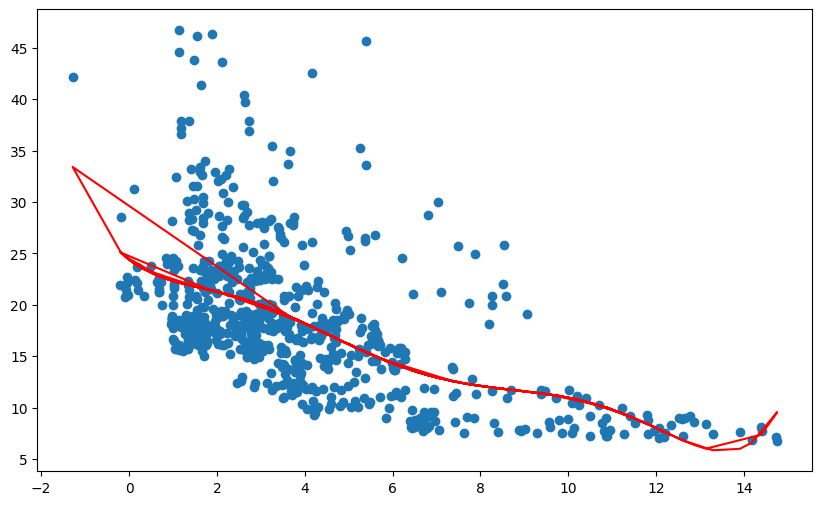

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, y_predicted, c="red")
plt.show()